In [11]:
import pandas as pd

# Load the dataset
# Replace 'crime_data.csv' with the path to your actual dataset file
df = pd.read_csv('e:\\KULYEAH\\SEMESTER 3\\Data Mining\\Cleaning Dataset US Crime\\Cleaning_US_Crime_NEW.csv')

# Display the first few rows to get a glimpse of the data
print("First five rows of the dataset:")
print(df.head())

# Get an overview of the DataFrame
print("\nDataset Information:")
print(df.info())

# Display data types of each column
print("\nData Types of Each Column:")
print(df.dtypes)

# Identify categorical and numerical variables
categorical_variables = [
    'Agency Name', 'Agency Type', 'City', 'State', 'Crime Type',
    'Crime Solved', 'Victim Sex', 'Victim Race',
    'Perpetrator Sex', 'Perpetrator Race','Relationship', 'Weapon'
]

numerical_variables = [
    'Year', 'Month', 'Incident', 'Victim Age',
    'Perpetrator Age'
]

print("\nCategorical Variables:")
print(categorical_variables)

print("\nNumerical Variables:")
print(numerical_variables)

# Ensure 'Month' is treated appropriately
# If 'Month' is a number, convert it to string for consistency
if df['Month'].dtype != 'object':
    df['Month'] = df['Month'].astype(str)

# For categorical variables, display the unique values
print("\nUnique values in categorical variables:")
for col in categorical_variables:
    unique_values = df[col].unique()
    print(f"\n{col} ({len(unique_values)} unique values):")
    print(unique_values)

# For numerical variables, display basic statistics
print("\nStatistical summary of numerical variables:")
print(df[numerical_variables].describe())

# Check for missing values in the dataset
print("\nMissing values in each column:")
print(df.isnull().sum())

# Display counts of each category in key categorical variables
key_categorical_variables = [
    'Crime Type', 'Crime Solved', 'Victim Sex', 'Perpetrator Sex',
    'Victim Race', 'Perpetrator Race', 'Weapon'
]

print("\nValue counts for key categorical variables:")
for col in key_categorical_variables:
    print(f"\n{col}:")
    print(df[col].value_counts())

# Identify key variables for analysis
key_variables = [
    'Year', 'Month', 'Crime Type', 'Crime Solved', 'Victim Sex', 'Victim Age',
    'Victim Race', 'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
    'Relationship', 'Weapon'
]

print("\nKey variables identified for analysis:")
print(key_variables)


First five rows of the dataset:
  Agency Name       Agency Type       City   State  Year     Month  Incident  \
0   Anchorage  Municipal Police  Anchorage  Alaska  1990  February         1   
1   Anchorage  Municipal Police  Anchorage  Alaska  1990     April         1   
2   Anchorage  Municipal Police  Anchorage  Alaska  1990     April         2   
3   Anchorage  Municipal Police  Anchorage  Alaska  1990      June         1   
4   Anchorage  Municipal Police  Anchorage  Alaska  1990    August         1   

               Crime Type Crime Solved Victim Sex  Victim Age  \
0  Murder or Manslaughter          Yes     Female        45.0   
1  Murder or Manslaughter          Yes     Female        23.0   
2  Murder or Manslaughter          Yes     Female        29.0   
3  Murder or Manslaughter          Yes     Female        69.0   
4  Murder or Manslaughter          Yes     Female        21.0   

                     Victim Race Perpetrator Sex  Perpetrator Age  \
0                          

In [12]:
import pandas as pd
import numpy as np

# Load the dataset
# Replace 'US_Crime_DataSet.csv' with the path to your actual dataset file
df = pd.read_csv('e:\\KULYEAH\\SEMESTER 3\\Data Mining\\Cleaning Dataset US Crime\\Cleaning_US_Crime_NEW.csv')

# Display the first few rows of the original DataFrame
print("Original DataFrame:")
print(df.head())

# Data Cleaning Steps

## 1. Replace 'Unknown' in 'Victim Age' and 'Perpetrator Age' with -1
df['Victim Age'] = df['Victim Age'].replace('Unknown', -1)
df['Perpetrator Age'] = df['Perpetrator Age'].replace('Unknown', -1)

## 2. Convert 'Victim Age' and 'Perpetrator Age' to numeric
df['Victim Age'] = pd.to_numeric(df['Victim Age'], errors='coerce')
df['Perpetrator Age'] = pd.to_numeric(df['Perpetrator Age'], errors='coerce')

## 3. Fill any remaining NaN values with -1
df['Victim Age'] = df['Victim Age'].fillna(-1)
df['Perpetrator Age'] = df['Perpetrator Age'].fillna(-1)

## 4. Convert 'Victim Age' and 'Perpetrator Age' to integers
df['Victim Age'] = df['Victim Age'].astype(int)
df['Perpetrator Age'] = df['Perpetrator Age'].astype(int)

## 5. Convert other numerical columns to appropriate data types
numerical_columns = ['Year', 'Month', 'Incident']

# Convert 'Month' to numeric if it's in textual format (e.g., 'January' to 1)
if df['Month'].dtype == 'object':
    month_mapping = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5,
                     'June':6, 'July':7, 'August':8, 'September':9, 'October':10,
                     'November':11, 'December':12}
    df['Month'] = df['Month'].map(month_mapping)

# Convert other numerical columns to numeric data types
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

## 6. Handle Missing Values in Critical Columns

# Since 'Unknown' is not treated as missing, we only handle actual NaN values
# For simplicity, let's drop rows with missing values in critical columns
critical_columns = ['Victim Sex', 'Perpetrator Sex', 'Crime Solved', 'Weapon', 'Crime Type']
df.dropna(subset=critical_columns, inplace=True)

## 7. Standardize Categorical Data

# List of categorical columns to standardize
categorical_columns = ['Agency Name', 'Agency Type', 'City', 'State', 'Crime Type',
                       'Crime Solved', 'Victim Sex', 'Victim Race',
                       'Perpetrator Sex', 'Perpetrator Race',
                       'Relationship', 'Weapon']

# Trim whitespace and convert to consistent case
for col in categorical_columns:
    df[col] = df[col].str.strip().str.title()

# Standardize entries in 'Victim Sex' and 'Perpetrator Sex'
sex_mapping = {'Male': 'Male', 'Female': 'Female', 'Unknown': 'Unknown'}
df['Victim Sex'] = df['Victim Sex'].map(sex_mapping)
df['Perpetrator Sex'] = df['Perpetrator Sex'].map(sex_mapping)

# Standardize entries in 'Crime Solved'
solved_mapping = {'Yes': 'Yes', 'No': 'No'}
df['Crime Solved'] = df['Crime Solved'].map(solved_mapping)

# Ensure 'Month' is an integer between 1 and 12
df['Month'] = df['Month'].astype(int)
df = df[(df['Month'] >= 1) & (df['Month'] <= 12)]

## 8. Outlier Detection and Handling

# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers in 'Victim Age' and 'Perpetrator Age'
victim_age_outliers, victim_lower, victim_upper = detect_outliers_iqr(df[df['Victim Age'] >= 0], 'Victim Age')
perp_age_outliers, perp_lower, perp_upper = detect_outliers_iqr(df[df['Perpetrator Age'] >= 0], 'Perpetrator Age')

print(f"Number of Victim Age outliers: {len(victim_age_outliers)}")
print(f"Number of Perpetrator Age outliers: {len(perp_age_outliers)}")

# Optionally, remove outliers or handle them appropriately
# For example, we can cap the outliers to the upper and lower bounds
def cap_outliers_iqr(data, column, lower_bound, upper_bound):
    data.loc[data[column] < lower_bound, column] = lower_bound
    data.loc[data[column] > upper_bound, column] = upper_bound

# Apply capping to 'Victim Age' and 'Perpetrator Age'
cap_outliers_iqr(df[df['Victim Age'] >= 0], 'Victim Age', victim_lower, victim_upper)
cap_outliers_iqr(df[df['Perpetrator Age'] >= 0], 'Perpetrator Age', perp_lower, perp_upper)

# Alternatively, you can remove the outliers
# df = df[~((df['Victim Age'] < victim_lower) | (df['Victim Age'] > victim_upper))]
# df = df[~((df['Perpetrator Age'] < perp_lower) | (df['Perpetrator Age'] > perp_upper))]

# Final Cleaned DataFrame
print("\nCleaned DataFrame after Outlier Handling:")
print(df.head())

# Optionally, save the cleaned data to a new CSV file
df.to_csv('crime_data_cleaned.csv', index=False)


Original DataFrame:
  Agency Name       Agency Type       City   State  Year     Month  Incident  \
0   Anchorage  Municipal Police  Anchorage  Alaska  1990  February         1   
1   Anchorage  Municipal Police  Anchorage  Alaska  1990     April         1   
2   Anchorage  Municipal Police  Anchorage  Alaska  1990     April         2   
3   Anchorage  Municipal Police  Anchorage  Alaska  1990      June         1   
4   Anchorage  Municipal Police  Anchorage  Alaska  1990    August         1   

               Crime Type Crime Solved Victim Sex  Victim Age  \
0  Murder or Manslaughter          Yes     Female        45.0   
1  Murder or Manslaughter          Yes     Female        23.0   
2  Murder or Manslaughter          Yes     Female        29.0   
3  Murder or Manslaughter          Yes     Female        69.0   
4  Murder or Manslaughter          Yes     Female        21.0   

                     Victim Race Perpetrator Sex  Perpetrator Age  \
0                          White       

C:\Users\kimic\AppData\Local\Temp\ipykernel_3960\279058900.py:98: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-7.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[column] < lower_bound, column] = lower_bound
C:\Users\kimic\AppData\Local\Temp\ipykernel_3960\279058900.py:98: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '12.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[column] < lower_bound, column] = lower_bound


=== Statistical Summary ===

Victim Age Statistics:
count    218572.000000
mean         34.578281
std          41.952122
min           1.000000
25%          21.000000
50%          29.000000
75%          40.000000
max         998.000000
Name: Victim Age, dtype: float64

Perpetrator Age Statistics:
count    218572.000000
mean         29.284991
std           9.984864
min           1.000000
25%          23.000000
50%          29.000000
75%          30.000000
max          99.000000
Name: Perpetrator Age, dtype: float64

Mode of Victim Age: [20]
Mode of Perpetrator Age: [29]

Range of Victim Age: 997
Range of Perpetrator Age: 98

=== Frequency Distributions ===

Crime Type Frequency:
Crime Type
Murder Or Manslaughter        215663
Manslaughter By Negligence      2909
Name: count, dtype: int64

Weapon Frequency:
Weapon
Handgun          118264
Knife             29284
Blunt Object      22421
Firearm           12027
Unknown           11157
Shotgun           10121
Rifle              7491
Strangul

C:\Users\kimic\AppData\Local\Temp\ipykernel_3960\390454660.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crimes_per_month.index, y=crimes_per_month.values, palette='viridis')


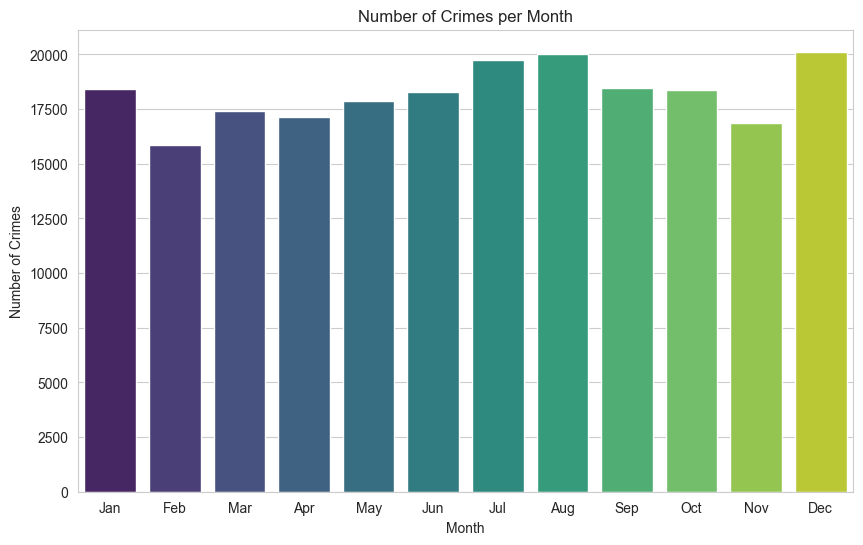


Crimes per Year:
Year
1990    21246
1991    22657
1992    23793
1993    24335
1994    23246
1995    21179
1996    18969
1997    17794
1998    16061
1999    14621
2000    14671
Name: count, dtype: int64


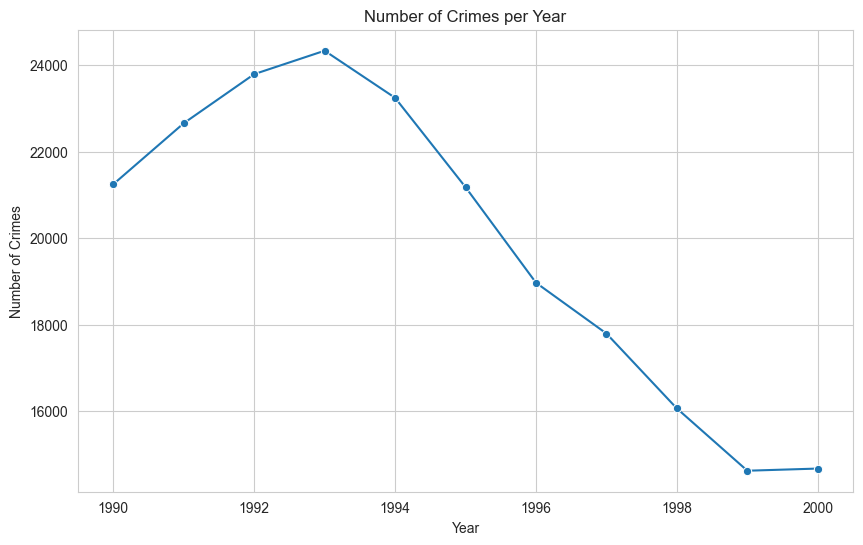


=== Geographical Analysis ===

Crimes per City:
City
Los Angeles    17210
New York       14942
Cook            8934
Wayne           6660
Harris          5431
               ...  
Garza              1
Hettinger          1
Oliver             1
Yoakum             1
Poquoson           1
Name: count, Length: 1670, dtype: int64


C:\Users\kimic\AppData\Local\Temp\ipykernel_3960\390454660.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='magma')


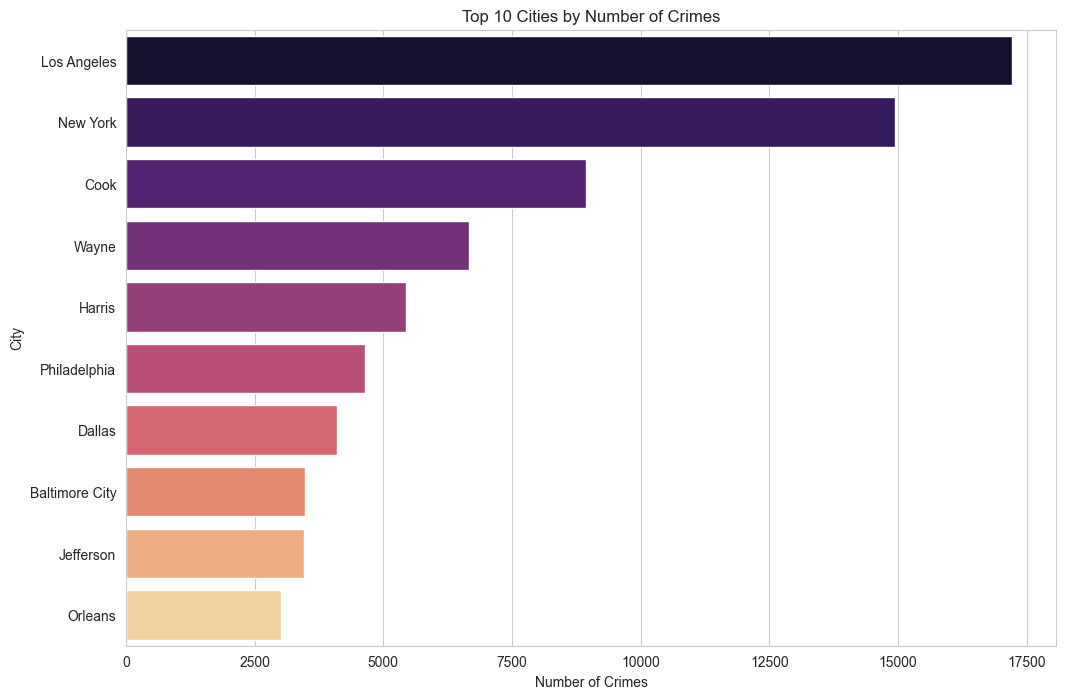


Crimes per State:
State
California              36872
Texas                   20738
New York                18580
Florida                 10290
Illinois                 9994
Michigan                 9390
Pennsylvania             7852
North Carolina           7569
Louisiana                7067
Georgia                  7007
Maryland                 6238
Ohio                     5862
Virginia                 5632
Missouri                 4929
Tennessee                4836
Arizona                  4228
New Jersey               4189
Alabama                  4171
Indiana                  3843
South Carolina           3778
District Of Columbia     2946
Oklahoma                 2855
Washington               2744
Arkansas                 2609
Wisconsin                2256
Mississippi              2166
Colorado                 2125
Kentucky                 2028
Massachusetts            1856
Connecticut              1787
Nevada                   1783
Oregon                   1487
Minnesota      

C:\Users\kimic\AppData\Local\Temp\ipykernel_3960\390454660.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crimes_per_state.values, y=crimes_per_state.index, palette='coolwarm')


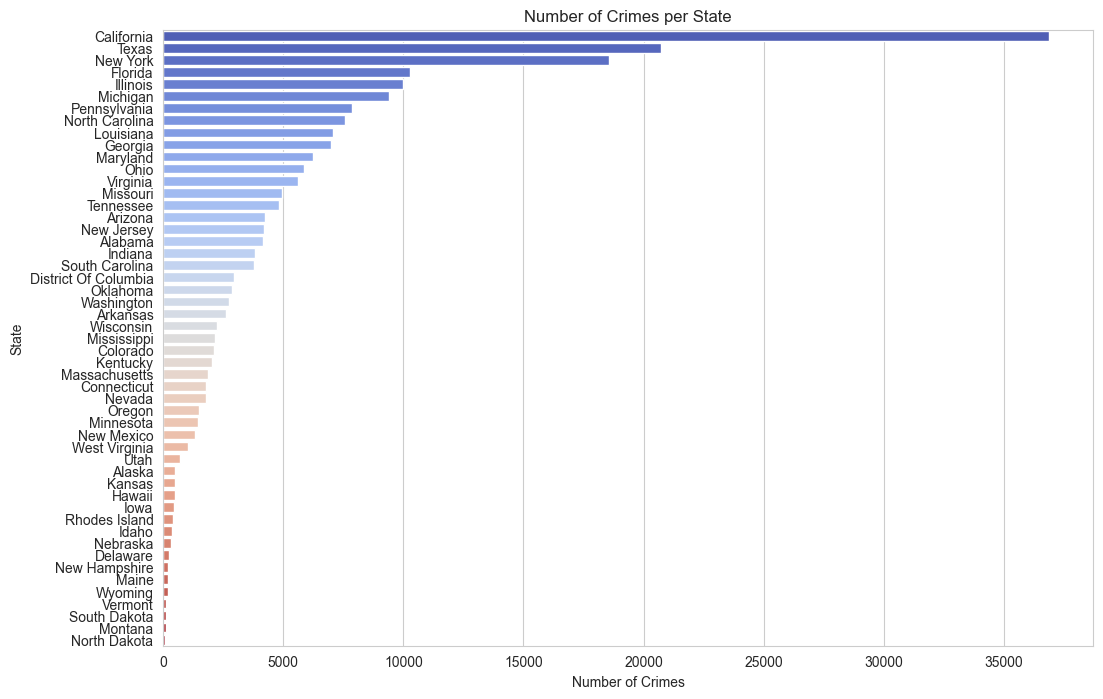


=== Additional Exploratory Data Analysis ===

Victim Sex Distribution:
Victim Sex
Male       169850
Female      48376
Unknown       346
Name: count, dtype: int64


C:\Users\kimic\AppData\Local\Temp\ipykernel_3960\390454660.py:130: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Victim Sex', data=df, palette='pastel')


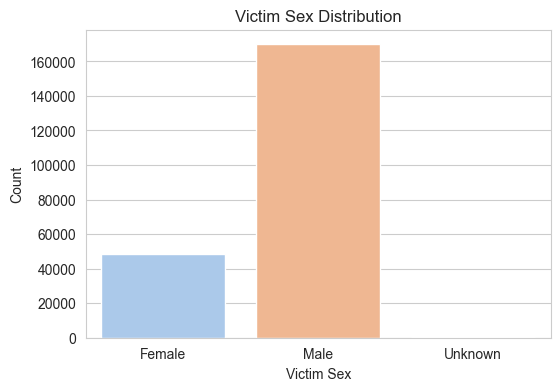


Perpetrator Sex Distribution:
Perpetrator Sex
Male       134910
Unknown     68687
Female      14975
Name: count, dtype: int64


C:\Users\kimic\AppData\Local\Temp\ipykernel_3960\390454660.py:141: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Perpetrator Sex', data=df, palette='Set2')


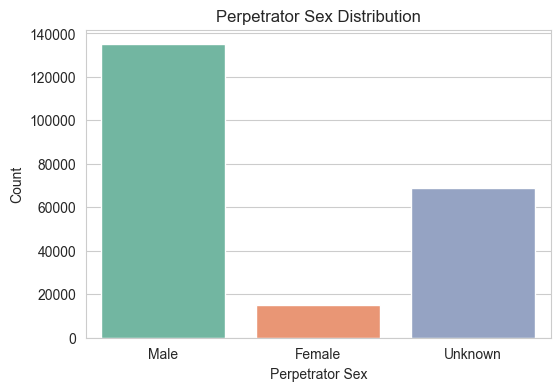

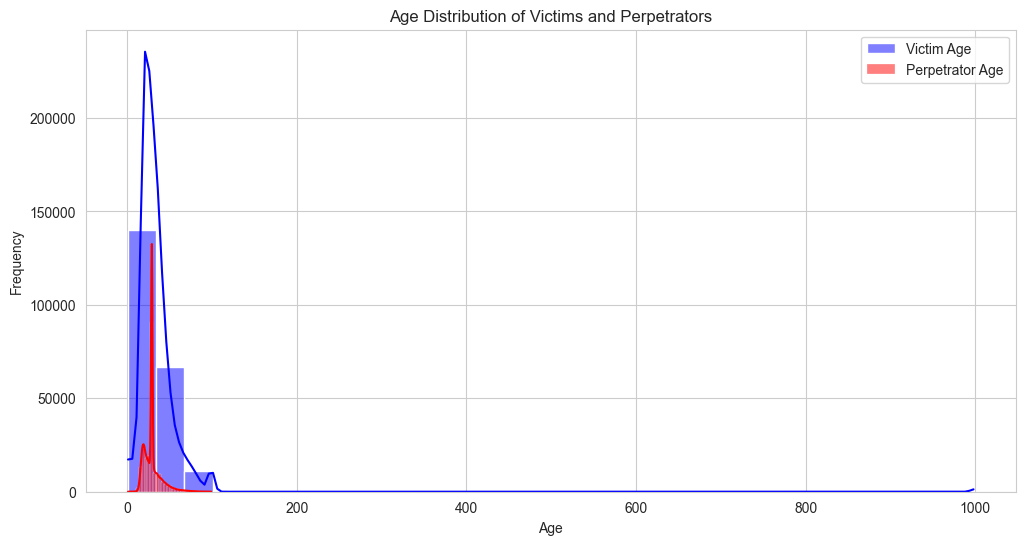


Correlation Matrix:
                 Victim Age  Perpetrator Age
Victim Age         1.000000         0.113809
Perpetrator Age    0.113809         1.000000


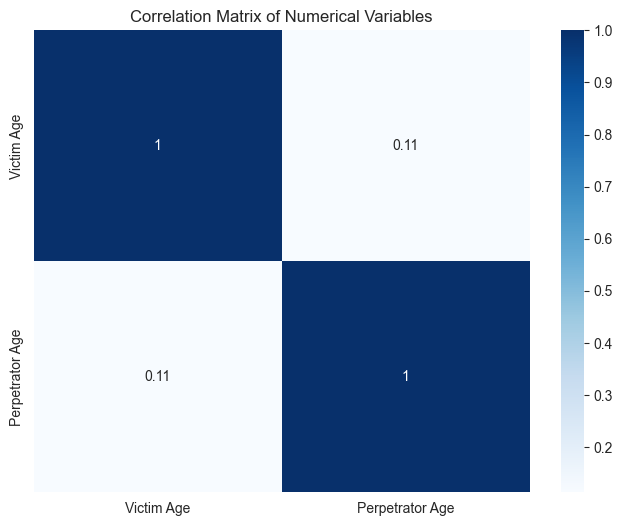


Crime Solved vs. Crime Type:
Crime Type    Manslaughter By Negligence  Murder Or Manslaughter
Crime Solved                                                    
No                                   138                   68606
Yes                                 2771                  147057


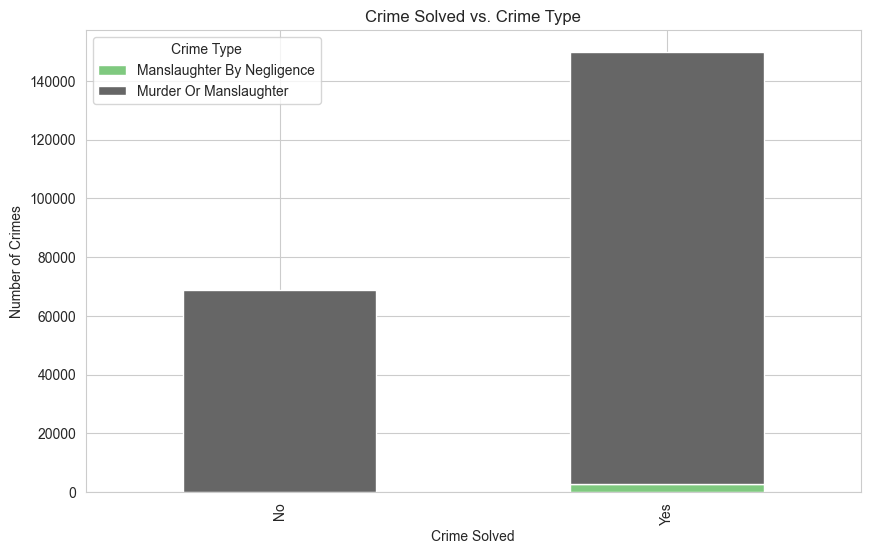


=== Scatter Plots ===



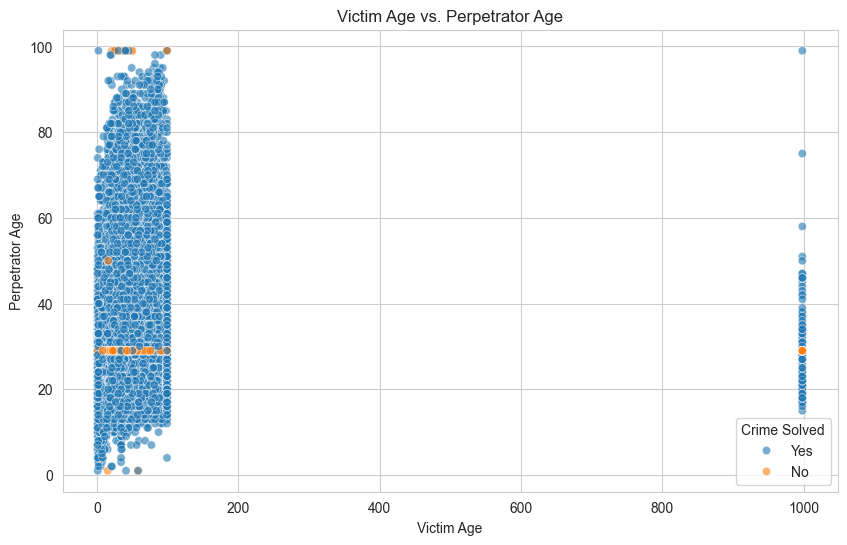

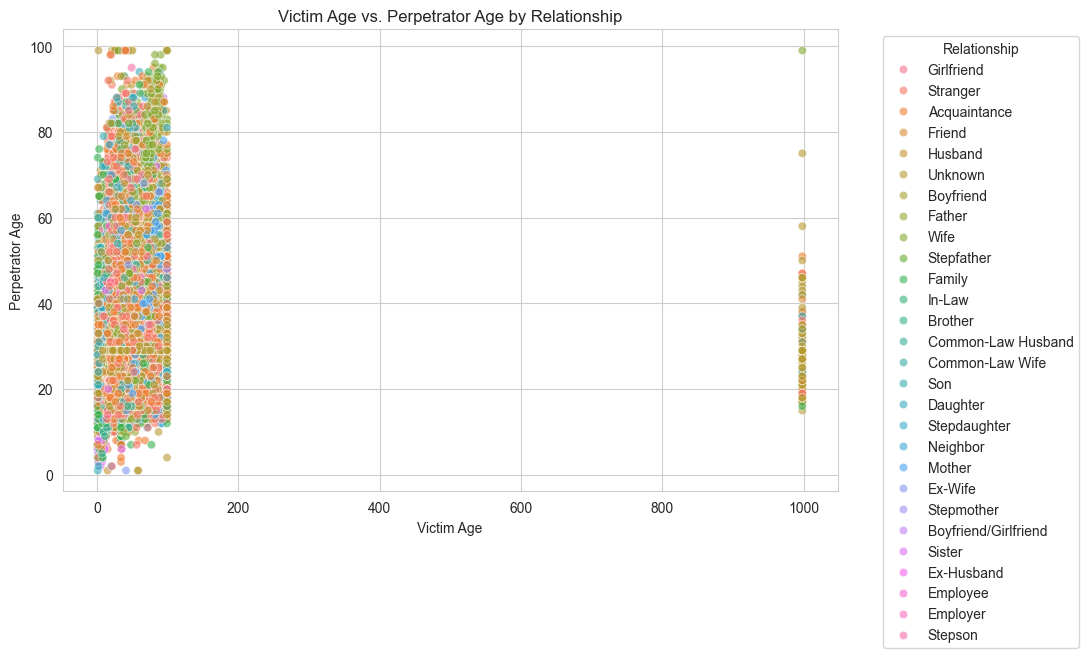


=== Box Plots ===



C:\Users\kimic\AppData\Local\Temp\ipykernel_3960\390454660.py:208: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Victim Sex', y='Victim Age', data=df, palette='pastel')


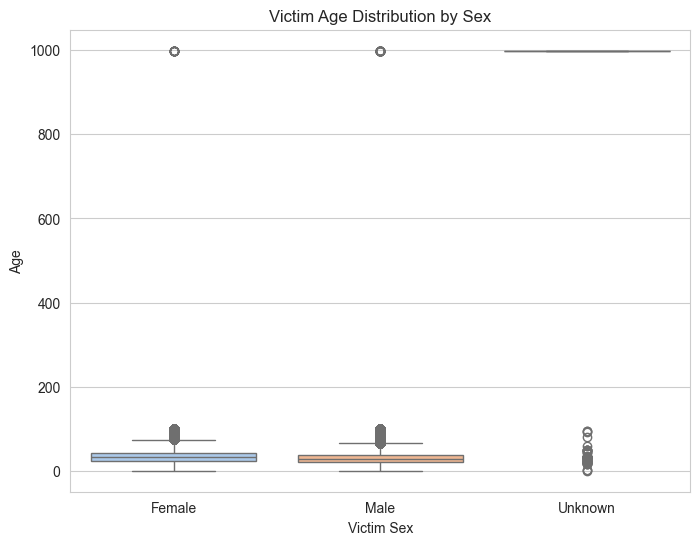

C:\Users\kimic\AppData\Local\Temp\ipykernel_3960\390454660.py:216: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Perpetrator Sex', y='Perpetrator Age', data=df, palette='Set2')


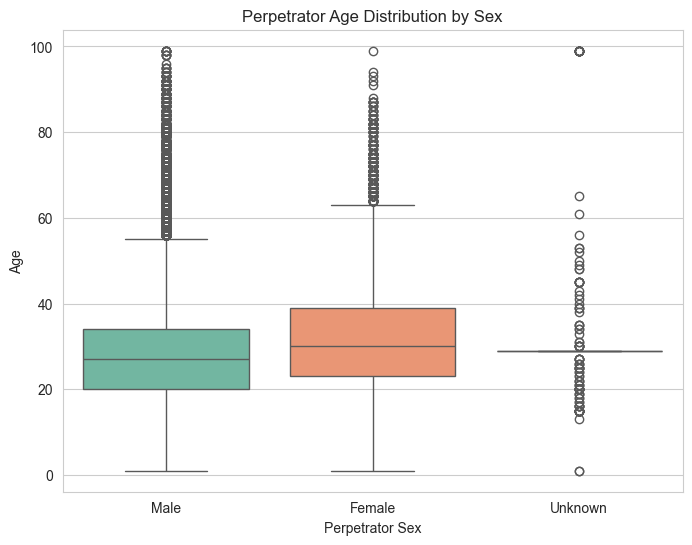

C:\Users\kimic\AppData\Local\Temp\ipykernel_3960\390454660.py:228: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Weapon', y='Victim Age', data=df_top_weapons, palette='Blues')


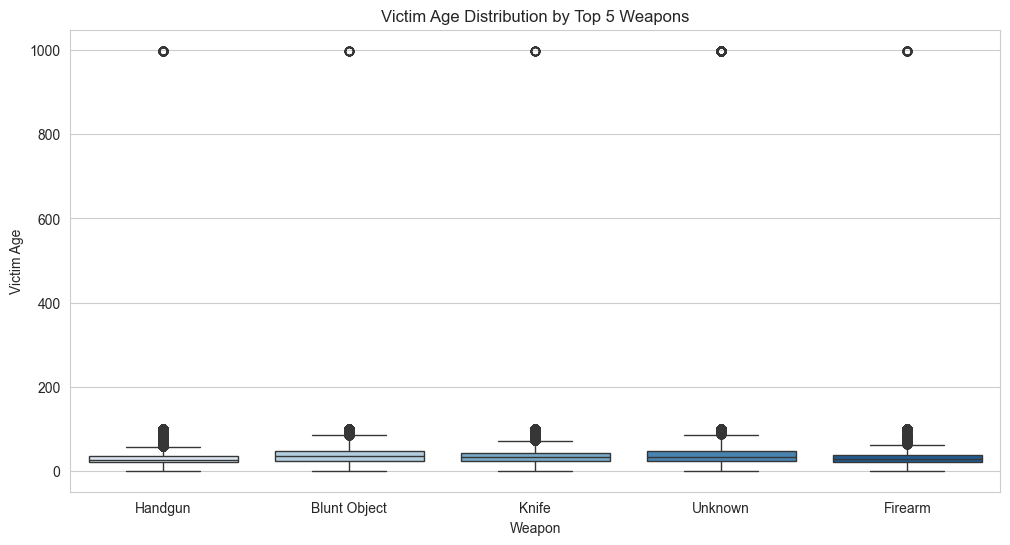

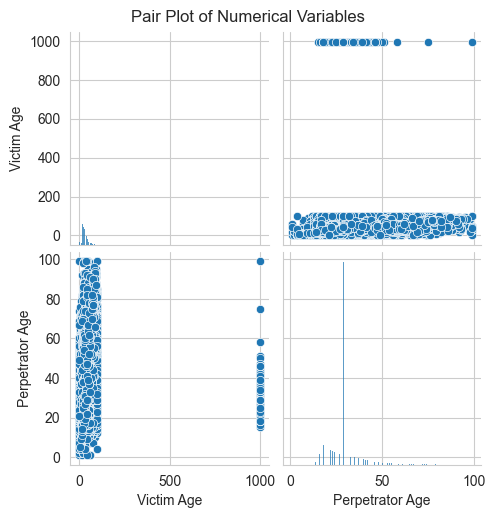

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better aesthetics
sns.set_style('whitegrid')

# Load the cleaned dataset
# Replace 'crime_data_cleaned.csv' with the path to your cleaned dataset file
df = pd.read_csv('crime_data_cleaned.csv')

# Ensure that 'Month' is numeric for time series analysis
if df['Month'].dtype != 'int64' and df['Month'].dtype != 'float64':
    month_mapping = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5,
                     'June':6, 'July':7, 'August':8, 'September':9, 'October':10,
                     'November':11, 'December':12}
    df['Month'] = df['Month'].map(month_mapping)

# 1. Statistical Summaries

print("=== Statistical Summary ===\n")

# Victim Age
print("Victim Age Statistics:")
print(df['Victim Age'].describe())

# Perpetrator Age
print("\nPerpetrator Age Statistics:")
print(df['Perpetrator Age'].describe())

# Mode of Victim Age and Perpetrator Age
print("\nMode of Victim Age:", df['Victim Age'].mode().values)
print("Mode of Perpetrator Age:", df['Perpetrator Age'].mode().values)

# Range of Victim Age and Perpetrator Age
victim_age_range = df['Victim Age'].max() - df['Victim Age'].min()
perp_age_range = df['Perpetrator Age'].max() - df['Perpetrator Age'].min()
print("\nRange of Victim Age:", victim_age_range)
print("Range of Perpetrator Age:", perp_age_range)

# 2. Frequency Distributions

print("\n=== Frequency Distributions ===\n")

# Crime Type Frequency
print("Crime Type Frequency:")
print(df['Crime Type'].value_counts())

# Weapon Frequency
print("\nWeapon Frequency:")
print(df['Weapon'].value_counts())

# Relationship Frequency
print("\nRelationship Frequency:")
print(df['Relationship'].value_counts())

# 3. Time Series Analysis

print("\n=== Time Series Analysis ===\n")

# Crimes per Month
crimes_per_month = df['Month'].value_counts().sort_index()
print("Crimes per Month:")
print(crimes_per_month)

# Plot Crimes per Month
plt.figure(figsize=(10,6))
sns.barplot(x=crimes_per_month.index, y=crimes_per_month.values, palette='viridis')
plt.title('Number of Crimes per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(ticks=range(0,12), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

# Crimes per Year (if applicable)
if df['Year'].nunique() > 1:
    crimes_per_year = df['Year'].value_counts().sort_index()
    print("\nCrimes per Year:")
    print(crimes_per_year)
    
    # Plot Crimes per Year
    plt.figure(figsize=(10,6))
    sns.lineplot(x=crimes_per_year.index, y=crimes_per_year.values, marker='o')
    plt.title('Number of Crimes per Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Crimes')
    plt.show()

# 4. Geographical Analysis

print("\n=== Geographical Analysis ===\n")

# Crimes per City
crimes_per_city = df['City'].value_counts()
print("Crimes per City:")
print(crimes_per_city)

# Plot Crimes per City (Top 10 cities)
plt.figure(figsize=(12,8))
top_cities = crimes_per_city.head(10)
sns.barplot(x=top_cities.values, y=top_cities.index, palette='magma')
plt.title('Top 10 Cities by Number of Crimes')
plt.xlabel('Number of Crimes')
plt.ylabel('City')
plt.show()

# Crimes per State
crimes_per_state = df['State'].value_counts()
print("\nCrimes per State:")
print(crimes_per_state)

# Plot Crimes per State
plt.figure(figsize=(12,8))
sns.barplot(x=crimes_per_state.values, y=crimes_per_state.index, palette='coolwarm')
plt.title('Number of Crimes per State')
plt.xlabel('Number of Crimes')
plt.ylabel('State')
plt.show()

# 5. Additional EDA

print("\n=== Additional Exploratory Data Analysis ===\n")

# Victim Sex Distribution
print("Victim Sex Distribution:")
print(df['Victim Sex'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x='Victim Sex', data=df, palette='pastel')
plt.title('Victim Sex Distribution')
plt.xlabel('Victim Sex')
plt.ylabel('Count')
plt.show()

# Perpetrator Sex Distribution
print("\nPerpetrator Sex Distribution:")
print(df['Perpetrator Sex'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x='Perpetrator Sex', data=df, palette='Set2')
plt.title('Perpetrator Sex Distribution')
plt.xlabel('Perpetrator Sex')
plt.ylabel('Count')
plt.show()

# Age Distribution Histograms
plt.figure(figsize=(12,6))
sns.histplot(df[df['Victim Age'] >= 0]['Victim Age'], kde=True, color='blue', label='Victim Age', bins=30)
sns.histplot(df[df['Perpetrator Age'] >= 0]['Perpetrator Age'], kde=True, color='red', label='Perpetrator Age', bins=30)
plt.title('Age Distribution of Victims and Perpetrators')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Correlation Matrix for Numerical Variables
numerical_cols = ['Victim Age', 'Perpetrator Age']
corr_matrix = df[numerical_cols].corr()

print("\nCorrelation Matrix:")
print(corr_matrix)

# Heatmap of Correlation Matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Crime Solved vs. Crime Type Crosstab
crime_solved_ct = pd.crosstab(df['Crime Solved'], df['Crime Type'])
print("\nCrime Solved vs. Crime Type:")
print(crime_solved_ct)

# Plot Crime Solved vs. Crime Type
crime_solved_ct.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Accent')
plt.title('Crime Solved vs. Crime Type')
plt.xlabel('Crime Solved')
plt.ylabel('Number of Crimes')
plt.show()

print("\n=== Scatter Plots ===\n")

# Scatter Plot: Victim Age vs. Perpetrator Age
plt.figure(figsize=(10,6))
sns.scatterplot(x='Victim Age', y='Perpetrator Age', data=df, hue='Crime Solved', alpha=0.6)
plt.title('Victim Age vs. Perpetrator Age')
plt.xlabel('Victim Age')
plt.ylabel('Perpetrator Age')
plt.legend(title='Crime Solved')
plt.show()

# Scatter Plot: Victim Age vs. Perpetrator Age by Relationship
plt.figure(figsize=(10,6))
sns.scatterplot(x='Victim Age', y='Perpetrator Age', data=df, hue='Relationship', alpha=0.6)
plt.title('Victim Age vs. Perpetrator Age by Relationship')
plt.xlabel('Victim Age')
plt.ylabel('Perpetrator Age')
plt.legend(title='Relationship', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 7. Box Plots

print("\n=== Box Plots ===\n")

# Box Plot: Victim Age by Victim Sex
plt.figure(figsize=(8,6))
sns.boxplot(x='Victim Sex', y='Victim Age', data=df, palette='pastel')
plt.title('Victim Age Distribution by Sex')
plt.xlabel('Victim Sex')
plt.ylabel('Age')
plt.show()

# Box Plot: Perpetrator Age by Perpetrator Sex
plt.figure(figsize=(8,6))
sns.boxplot(x='Perpetrator Sex', y='Perpetrator Age', data=df, palette='Set2')
plt.title('Perpetrator Age Distribution by Sex')
plt.xlabel('Perpetrator Sex')
plt.ylabel('Age')
plt.show()

# Box Plot: Victim Age by Weapon Used
# Displaying top 5 most common weapons
top_weapons = df['Weapon'].value_counts().head(5).index
df_top_weapons = df[df['Weapon'].isin(top_weapons)]

plt.figure(figsize=(12,6))
sns.boxplot(x='Weapon', y='Victim Age', data=df_top_weapons, palette='Blues')
plt.title('Victim Age Distribution by Top 5 Weapons')
plt.xlabel('Weapon')
plt.ylabel('Victim Age')
plt.show()

# 8. Additional Scatter Plots and Pair Plots

# Pair Plot of Numerical Variables
numerical_cols = ['Victim Age', 'Perpetrator Age']
sns.pairplot(df[numerical_cols].dropna())
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


In [14]:
import pandas as pd
import numpy as np

# Load the cleaned dataset
# Replace 'crime_data_cleaned.csv' with the path to your cleaned dataset file
df = pd.read_csv('crime_data_cleaned.csv')

# Display the first few rows of the cleaned DataFrame
print("Cleaned DataFrame:")
print(df.head())

# Feature Engineering Steps

## 1. Create New Features

### a. Age Difference between Victim and Perpetrator

# Replace -1 (unknown ages) with NaN to avoid incorrect calculations
df['Victim Age'].replace(-1, np.nan, inplace=True)
df['Perpetrator Age'].replace(-1, np.nan, inplace=True)

# Create 'Age Difference' feature
df['Age Difference'] = abs(df['Victim Age'] - df['Perpetrator Age'])

# Fill NaN values in 'Age Difference' with a placeholder (e.g., -1)
df['Age Difference'] = df['Age Difference'].fillna(-1)

### b. Is Family Member Indicator

# Define a list of familial relationships
family_relationships = [
    'Husband', 'Wife', 'Mother', 'Father', 'Son', 'Daughter', 'Brother',
    'Sister', 'Family', 'In-Law', 'Stepfather', 'Stepmother', 'Stepdaughter',
    'Stepson', 'Ex-Husband', 'Ex-Wife'
]

# Create 'Is Family' feature
df['Is Family'] = df['Relationship'].apply(lambda x: 1 if x in family_relationships else 0)

### c. Weapon Type Grouping

# Group weapons into broader categories
weapon_mapping = {
    'Blunt Object': 'Blunt Object',
    'Firearm': 'Firearm',
    'Handgun': 'Firearm',
    'Shotgun': 'Firearm',
    'Rifle': 'Firearm',
    'Knife': 'Sharp Object',
    'Cutting Instrument': 'Sharp Object',
    'Strangulation': 'Other',
    'Suffocation': 'Other',
    'Drugs': 'Other',
    'Explosives': 'Other',
    'Fire': 'Other',
    'Drowning': 'Other',
    'Fall': 'Other',
    'Poison': 'Other',
    'Unknown': 'Unknown',
    'Other': 'Other'
}

# Map 'Weapon' column to new categories
df['Weapon Type'] = df['Weapon'].map(weapon_mapping)

# Fill any unmapped weapons with 'Other'
df['Weapon Type'] = df['Weapon Type'].fillna('Other')

### d. Crime Solved Encoding (Binary)

# Map 'Crime Solved' to binary values
solved_mapping = {'Yes': 1, 'No': 0}
df['Crime Solved Binary'] = df['Crime Solved'].map(solved_mapping)

## 2. Encode Categorical Variables

### a. Selecting Categorical Variables to Encode

# Identify categorical variables to encode
categorical_vars = [
    'Agency Type', 'State', 'City', 'Crime Type', 'Victim Sex',
    'Victim Race', 'Perpetrator Sex','Perpetrator Race', 'Relationship',
    'Weapon Type'
]

### b. One-Hot Encoding

# Use pandas get_dummies for one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

### c. Encoding Month (if needed)

# Since 'Month' is numerical but cyclical, consider encoding it
# For simplicity, let's create sine and cosine components
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

# Drop the original 'Month' column if not needed
# df.drop('Month', axis=1, inplace=True)

## 3. Handle Remaining Missing Values

# Check for remaining missing values
missing_values = df_encoded.isnull().sum()
print("\nMissing values after encoding:")
print(missing_values[missing_values > 0])

# If any, decide on a strategy to handle them
# For this example, we'll fill NaN values in numerical columns with -1
numerical_cols = df_encoded.select_dtypes(include=[np.number]).columns
df_encoded[numerical_cols] = df_encoded[numerical_cols].fillna(-1)

# Final Feature-Engineered DataFrame
print("\nFeature-Engineered DataFrame:")
print(df_encoded.head())

# Optionally, save the feature-engineered data to a new CSV file
df_encoded.to_csv('crime_data_feature_engineered.csv', index=False)


Cleaned DataFrame:
  Agency Name       Agency Type       City   State  Year  Month  Incident  \
0   Anchorage  Municipal Police  Anchorage  Alaska  1990      2         1   
1   Anchorage  Municipal Police  Anchorage  Alaska  1990      4         1   
2   Anchorage  Municipal Police  Anchorage  Alaska  1990      4         2   
3   Anchorage  Municipal Police  Anchorage  Alaska  1990      6         1   
4   Anchorage  Municipal Police  Anchorage  Alaska  1990      8         1   

               Crime Type Crime Solved Victim Sex  Victim Age  \
0  Murder Or Manslaughter          Yes     Female          45   
1  Murder Or Manslaughter          Yes     Female          23   
2  Murder Or Manslaughter          Yes     Female          29   
3  Murder Or Manslaughter          Yes     Female          69   
4  Murder Or Manslaughter          Yes     Female          21   

                     Victim Race Perpetrator Sex  Perpetrator Age  \
0                          White            Male          

C:\Users\kimic\AppData\Local\Temp\ipykernel_3960\242598084.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Victim Age'].replace(-1, np.nan, inplace=True)
C:\Users\kimic\AppData\Local\Temp\ipykernel_3960\242598084.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa


Missing values after encoding:
Series([], dtype: int64)

Feature-Engineered DataFrame:
  Agency Name  Year  Month  Incident Crime Solved  Victim Age  \
0   Anchorage  1990      2         1          Yes          45   
1   Anchorage  1990      4         1          Yes          23   
2   Anchorage  1990      4         2          Yes          29   
3   Anchorage  1990      6         1          Yes          69   
4   Anchorage  1990      8         1          Yes          21   

   Perpetrator Age        Weapon  Age Difference  Is Family  ...  \
0               49       Handgun               4          0  ...   
1               18       Handgun               5          0  ...   
2               28  Blunt Object               1          0  ...   
3               21  Blunt Object              48          0  ...   
4               21       Handgun               0          0  ...   

   Relationship_Stepfather  Relationship_Stepmother  Relationship_Stepson  \
0                    False         

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load the feature-engineered dataset
df = pd.read_csv('crime_data_feature_engineered.csv')

# Display the first few rows of the feature-engineered DataFrame
print("Feature-Engineered DataFrame:")
print(df.head())

# Data Preparation Steps

## 1. Separate Features and Target Variable

target_variable = 'Crime Solved Binary'

# Create feature matrix X and target vector y
X = df.drop(columns=[target_variable])
y = df[target_variable]

## 2. Handle Missing Values (if any)

# Check for remaining missing values in X
missing_values = X.isnull().sum()
print("\nMissing values in features:")
print(missing_values[missing_values > 0])

# Fill NaN values in numerical columns with -1
numerical_cols = X.select_dtypes(include=[np.number]).columns
X[numerical_cols] = X[numerical_cols].fillna(-1)

## 3. Feature Scaling

# Identify numerical columns to scale (excluding binary features)
features_to_scale = numerical_cols.drop(['Is Family'], errors='ignore')

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the features to scale and transform
X[features_to_scale] = scaler.fit_transform(X[features_to_scale])

## 4. Data Splitting

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("\nTraining and testing sets created.")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

## 5. Ensure All Features are Numeric

# Check data types of features in X_train
print("\nData types of features in X_train:")
print(X_train.dtypes.value_counts())

# Identify non-numeric columns
non_numeric_cols = X_train.select_dtypes(exclude=[np.number]).columns
if len(non_numeric_cols) > 0:
    print("\nNon-numeric columns found in X_train:")
    print(non_numeric_cols)
    # Drop non-numeric columns
    X_train = X_train.drop(columns=non_numeric_cols)
    X_test = X_test.drop(columns=non_numeric_cols)
else:
    print("\nAll features in X_train are numeric.")

## 6. Address Class Imbalance

# Check the class distribution in the training set
class_counts = y_train.value_counts()
print("\nClass distribution in training set:")
print(class_counts)

# If the classes are imbalanced, apply SMOTE to the training data
imbalance_ratio = class_counts.min() / class_counts.max()
print(f"\nImbalance ratio: {imbalance_ratio:.2f}")

if imbalance_ratio < 0.5:
    print("\nApplying SMOTE to balance classes in the training set...")
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    print("Resampling completed.")
    # Update training variables
    X_train = X_train_resampled
    y_train = y_train_resampled
    # Check the new class distribution
    print("\nClass distribution after resampling:")
    print(y_train.value_counts())
else:
    print("\nClass imbalance is acceptable. No resampling needed.")

## 7. Final Prepared Data

print("\nData preparation for modeling is complete.")
print(f"Final training set size: {X_train.shape[0]} samples")
print(f"Final testing set size: {X_test.shape[0]} samples")


Feature-Engineered DataFrame:
  Agency Name  Year  Month  Incident Crime Solved  Victim Age  \
0   Anchorage  1990      2         1          Yes          45   
1   Anchorage  1990      4         1          Yes          23   
2   Anchorage  1990      4         2          Yes          29   
3   Anchorage  1990      6         1          Yes          69   
4   Anchorage  1990      8         1          Yes          21   

   Perpetrator Age        Weapon  Age Difference  Is Family  ...  \
0               49       Handgun               4          0  ...   
1               18       Handgun               5          0  ...   
2               28  Blunt Object               1          0  ...   
3               21  Blunt Object              48          0  ...   
4               21       Handgun               0          0  ...   

   Relationship_Stepfather  Relationship_Stepmother  Relationship_Stepson  \
0                    False                    False                 False   
1               

=== Decision Tree Classifier Evaluation ===

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86     20623
           1       0.94      0.92      0.93     44949

    accuracy                           0.91     65572
   macro avg       0.89      0.90      0.89     65572
weighted avg       0.91      0.91      0.91     65572

Confusion Matrix:
[[18024  2599]
 [ 3414 41535]]
Accuracy: 0.9083
ROC-AUC Score: 0.9025

=== Random Forest Classifier Evaluation ===

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     20623
           1       0.97      0.92      0.94     44949

    accuracy                           0.93     65572
   macro avg       0.91      0.93      0.92     65572
weighted avg       0.93      0.93      0.93     65572

Confusion Matrix:
[[19436  1187]
 [ 3640 41309]]
Accuracy: 0.9264
ROC-AUC Score: 0.9584

Top 10 Important Features:
     

C:\Users\kimic\AppData\Local\Temp\ipykernel_3960\255899439.py:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


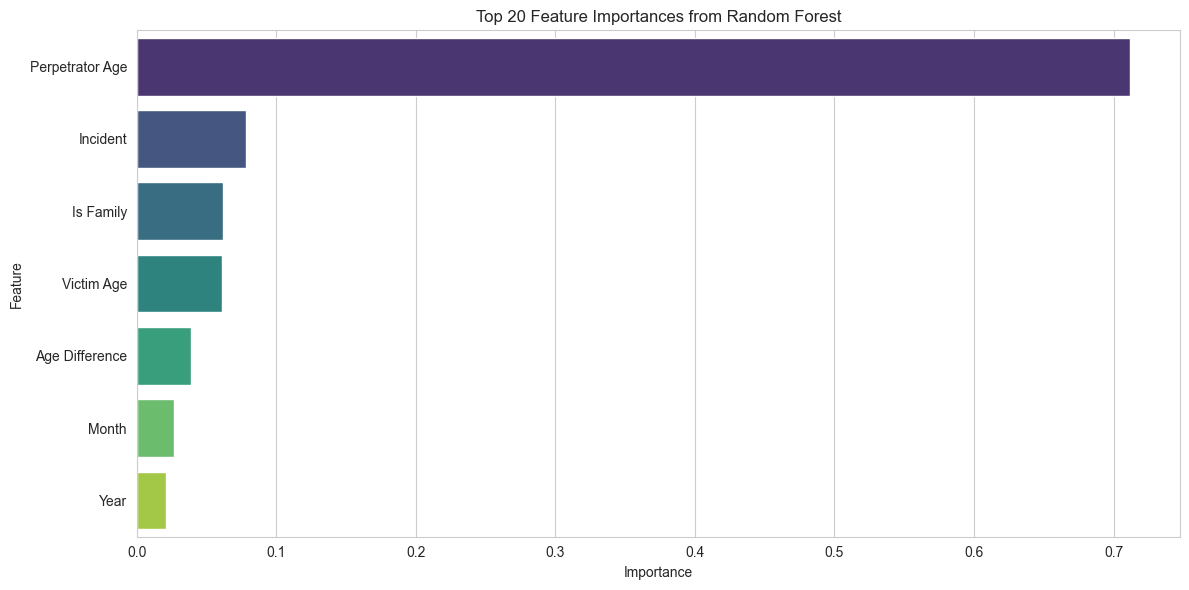

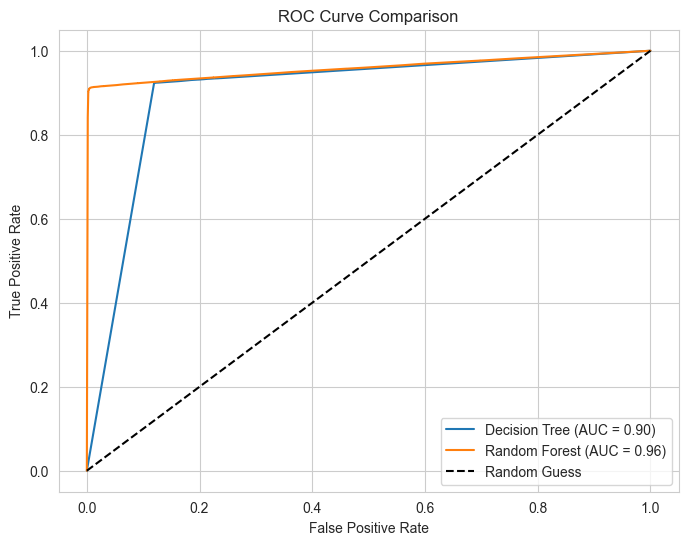


Performing Grid Search for Random Forest...
Fitting 3 folds for each of 72 candidates, totalling 216 fits

Best Parameters Found:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

=== Tuned Random Forest Classifier Evaluation ===

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91     20623
           1       0.99      0.91      0.95     44949

    accuracy                           0.94     65572
   macro avg       0.92      0.95      0.93     65572
weighted avg       0.95      0.94      0.94     65572

Confusion Matrix:
[[20404   219]
 [ 3842 41107]]
Accuracy: 0.9381
ROC-AUC Score: 0.9592

Performing Grid Search for Random Forest...
Fitting 3 folds for each of 48 candidates, totalling 144 fits


C:\Users\kimic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
72 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kimic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kimic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pac


Best Parameters Found:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

=== Tuned Random Forest Classifier Evaluation ===

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91     20623
           1       0.99      0.91      0.95     44949

    accuracy                           0.94     65572
   macro avg       0.92      0.95      0.93     65572
weighted avg       0.95      0.94      0.94     65572

Confusion Matrix:
[[20404   219]
 [ 3842 41107]]
Accuracy: 0.9381
ROC-AUC Score: 0.9592


['best_random_forest_model.joblib']

In [16]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score,
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load the prepared training and testing sets
# If you saved the datasets in the previous steps, load them
# For this example, we'll assume X_train, X_test, y_train, y_test are already in memory

# If not, you can load them from CSV files:
# X_train = pd.read_csv('X_train.csv')
# X_test = pd.read_csv('X_test.csv')
# y_train = pd.read_csv('y_train.csv')
# y_test = pd.read_csv('y_test.csv')

# Ensure y_train and y_test are properly formatted
# y_train = y_train.values.ravel()
# y_test = y_test.values.ravel()

# Modeling Steps

## 1. Decision Tree Classifier

### a. Initialize the Model

dt_classifier = DecisionTreeClassifier(random_state=42)

### b. Train the Model

dt_classifier.fit(X_train, y_train)

### c. Predict on Test Set

y_pred_dt = dt_classifier.predict(X_test)

### d. Evaluate the Model

print("=== Decision Tree Classifier Evaluation ===\n")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(conf_matrix_dt)

# Accuracy Score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy_dt:.4f}")

# ROC-AUC Score
y_proba_dt = dt_classifier.predict_proba(X_test)[:, 1]
roc_auc_dt = roc_auc_score(y_test, y_proba_dt)
print(f"ROC-AUC Score: {roc_auc_dt:.4f}")

### e. Visualize the Decision Tree (Optional)

# Plot the decision tree (may not be practical for large trees)
# plt.figure(figsize=(20,10))
# plot_tree(dt_classifier, filled=True, feature_names=X_train.columns, class_names=['No', 'Yes'])
# plt.show()

## 2. Random Forest Classifier

### a. Initialize the Model

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

### b. Train the Model

rf_classifier.fit(X_train, y_train)

### c. Predict on Test Set

y_pred_rf = rf_classifier.predict(X_test)

### d. Evaluate the Model

print("\n=== Random Forest Classifier Evaluation ===\n")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)

# Accuracy Score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")

# ROC-AUC Score
y_proba_rf = rf_classifier.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f"ROC-AUC Score: {roc_auc_rf:.4f}")

### e. Feature Importance

importances = rf_classifier.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Important Features:")
print(feature_importance_df.head(10))

# Plot Feature Importances

plt.figure(figsize=(12, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance_df.head(20),
    palette='viridis'
)
plt.title('Top 20 Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## 3. ROC Curves Comparison

plt.figure(figsize=(8, 6))

# Decision Tree ROC
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

# Random Forest ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Random Guess ROC
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## 4. Hyperparameter Tuning (Optional)

## 4. Hyperparameter Tuning (Optional)

from sklearn.model_selection import GridSearchCV

### a. Define Parameter Grid for Random Forest

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]  # Corrected values
}

### b. Initialize GridSearchCV

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=2
)

### c. Fit GridSearchCV

print("\nPerforming Grid Search for Random Forest...")
grid_search_rf.fit(X_train, y_train)

### d. Best Parameters and Model

print("\nBest Parameters Found:")
print(grid_search_rf.best_params_)

best_rf_classifier = grid_search_rf.best_estimator_

### e. Evaluate Tuned Random Forest Model

y_pred_best_rf = best_rf_classifier.predict(X_test)
y_proba_best_rf = best_rf_classifier.predict_proba(X_test)[:, 1]
roc_auc_best_rf = roc_auc_score(y_test, y_proba_best_rf)

print("\n=== Tuned Random Forest Classifier Evaluation ===\n")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_best_rf))

# Confusion Matrix
conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf)
print("Confusion Matrix:")
print(conf_matrix_best_rf)

# Accuracy Score
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Accuracy: {accuracy_best_rf:.4f}")

# ROC-AUC Score
print(f"ROC-AUC Score: {roc_auc_best_rf:.4f}")
from sklearn.model_selection import GridSearchCV

### a. Define Parameter Grid for Random Forest

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

### b. Initialize GridSearchCV

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=2
)

### c. Fit GridSearchCV

print("\nPerforming Grid Search for Random Forest...")
grid_search_rf.fit(X_train, y_train)

### d. Best Parameters and Model

print("\nBest Parameters Found:")
print(grid_search_rf.best_params_)

best_rf_classifier = grid_search_rf.best_estimator_

### e. Evaluate Tuned Random Forest Model

y_pred_best_rf = best_rf_classifier.predict(X_test)
y_proba_best_rf = best_rf_classifier.predict_proba(X_test)[:, 1]
roc_auc_best_rf = roc_auc_score(y_test, y_proba_best_rf)

print("\n=== Tuned Random Forest Classifier Evaluation ===\n")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_best_rf))

# Confusion Matrix
conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf)
print("Confusion Matrix:")
print(conf_matrix_best_rf)

# Accuracy Score
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Accuracy: {accuracy_best_rf:.4f}")

# ROC-AUC Score
print(f"ROC-AUC Score: {roc_auc_best_rf:.4f}")

## 5. Save the Best Model (Optional)

import joblib

# Save the best model to a file
joblib.dump(best_rf_classifier, 'best_random_forest_model.joblib')

# Load the model from the file (for future use)
# loaded_model = joblib.load('best_random_forest_model.joblib')


### Scatter Plot

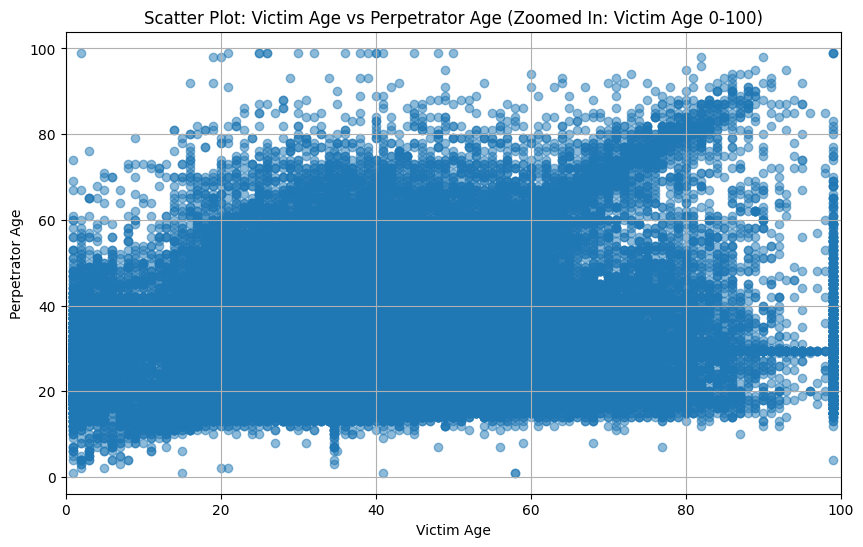

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the new dataset
dataset = pd.read_csv('e:\\KULYEAH\\SEMESTER 3\\Data Mining\\Cleaning Dataset US Crime\\Cleaning_US_Crime_NEW.csv')

# Drop unnecessary columns if they exist in the new dataset
drop_columns = ['Record ID', 'Victim Count', 'Perpetrator Count', 'Agency Code', 'Victim Ethnicity', 'Perpetrator Ethnicity', 'Record Source']
dataset.drop(columns=[col for col in drop_columns if col in dataset.columns], inplace=True, errors='ignore')

# Create scatter plot for Victim Age vs Perpetrator Age if these columns exist
if 'Victim Age' in dataset.columns and 'Perpetrator Age' in dataset.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(dataset['Victim Age'], dataset['Perpetrator Age'], alpha=0.5)
    plt.title('Scatter Plot: Victim Age vs Perpetrator Age (Zoomed In: Victim Age 0-100)')
    plt.xlabel('Victim Age')
    plt.ylabel('Perpetrator Age')
    plt.xlim(0, 100)  # Setting x-axis limit to zoom in on Victim Age range (0-100)
    plt.grid(True)
    plt.show()
else:
    print("Columns 'Victim Age' and/or 'Perpetrator Age' not found in the dataset.")





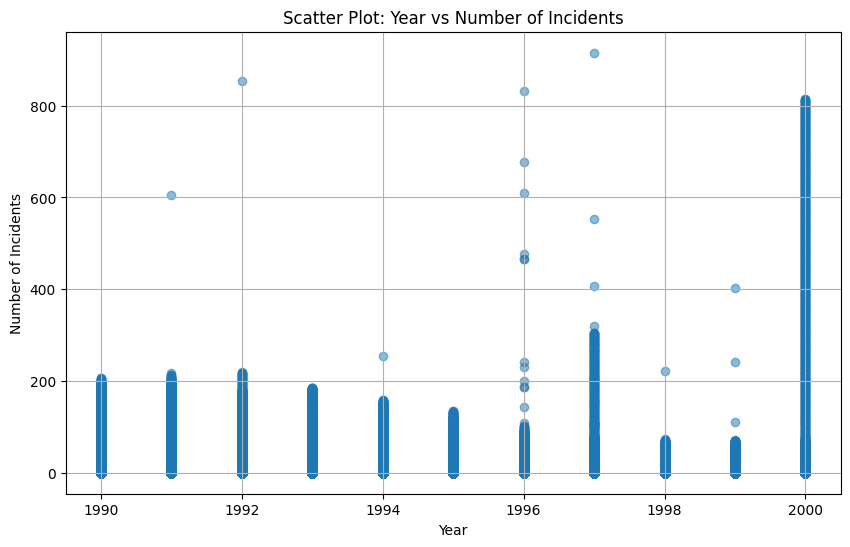

In [10]:
# Create scatter plot for Year vs Number of Incidents if these columns exist
if 'Year' in dataset.columns and 'Incident' in dataset.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(dataset['Year'], dataset['Incident'], alpha=0.5)
    plt.title('Scatter Plot: Year vs Number of Incidents')
    plt.xlabel('Year')
    plt.ylabel('Number of Incidents')
    plt.grid(True)
    plt.show()
else:
    print("Columns 'Year' and/or 'Incident' not found in the dataset.")

### Boxplot

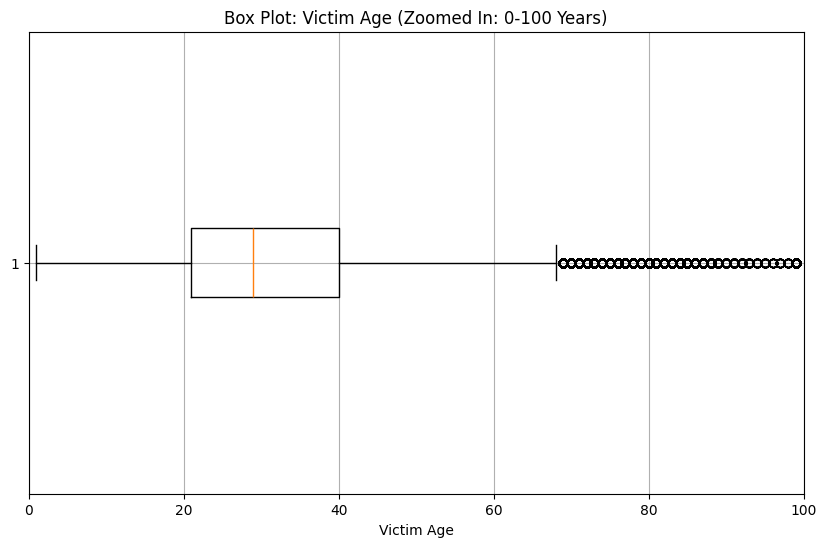

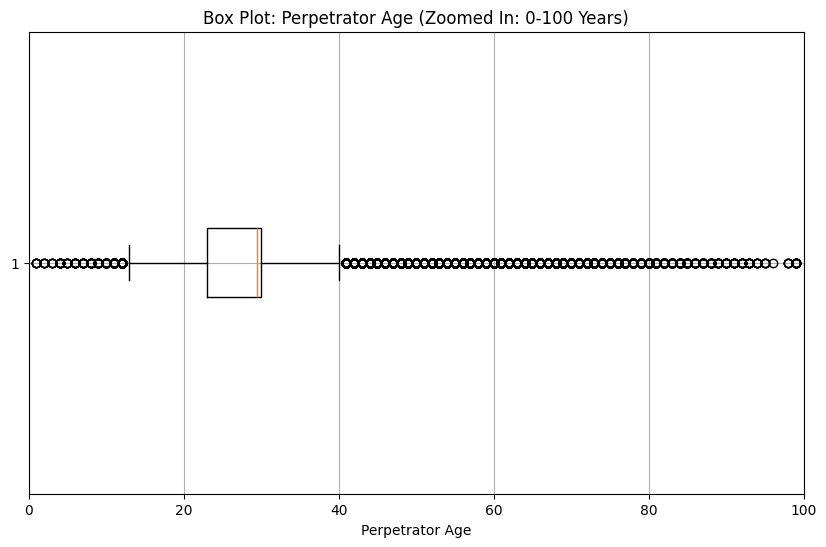

In [12]:
# Create box plot for Victim Age (Zoomed In: 0-100 years) if the column exists
if 'Victim Age' in dataset.columns:
    plt.figure(figsize=(10, 6))
    plt.boxplot(dataset['Victim Age'].dropna(), vert=False)
    plt.title('Box Plot: Victim Age (Zoomed In: 0-100 Years)')
    plt.xlabel('Victim Age')
    plt.xlim(0, 100)  # Setting x-axis limit to zoom in on Victim Age range (0-100)
    plt.grid(True)
    plt.show()
else:
    print("Column 'Victim Age' not found in the dataset.")

# Create box plot for Perpetrator Age (Zoomed In: 0-100 years) if the column exists
if 'Perpetrator Age' in dataset.columns:
    plt.figure(figsize=(10, 6))
    plt.boxplot(dataset['Perpetrator Age'].dropna(), vert=False)
    plt.title('Box Plot: Perpetrator Age (Zoomed In: 0-100 Years)')
    plt.xlabel('Perpetrator Age')
    plt.xlim(0, 100)  # Setting x-axis limit to zoom in on Perpetrator Age range (0-100)
    plt.grid(True)
    plt.show()
else:
    print("Column 'Perpetrator Age' not found in the dataset.")
